<a href="https://colab.research.google.com/github/deepesh-khamat/Test_cwebsite/blob/main/Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd  # Import Pandas for data manipulation
import numpy as np   # Import NumPy for numerical operations
import matplotlib.pyplot as plt  # Import Matplotlib for data visualization
import seaborn as sns  # Import Seaborn for enhanced data visualization

# Read the x_train CSV file into a Pandas DataFrame
x_train = pd.read_csv('x_train.csv')
x_train = pd.read_csv('y_train.csv')

# Display the first few rows of the DataFrame to check the data
print(x_train.head())


   0
0  0
1  0
2  0
3  0
4  0


In [28]:
print(x_train.shape)
print(y_train.shape)


(9690, 1)
(9690, 1)


In [ ]:
x_train.isnull().sum()


0    0
dtype: int64

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on x_train
scaler.fit(x_train)

# Transform and normalize the x_train data
x_train_normalized = scaler.transform(x_train)


<ipython-input-31-ace8d747336c>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(feature1, feature2, c=y_train, cmap='viridis')  # Use labels as colors (y_train)


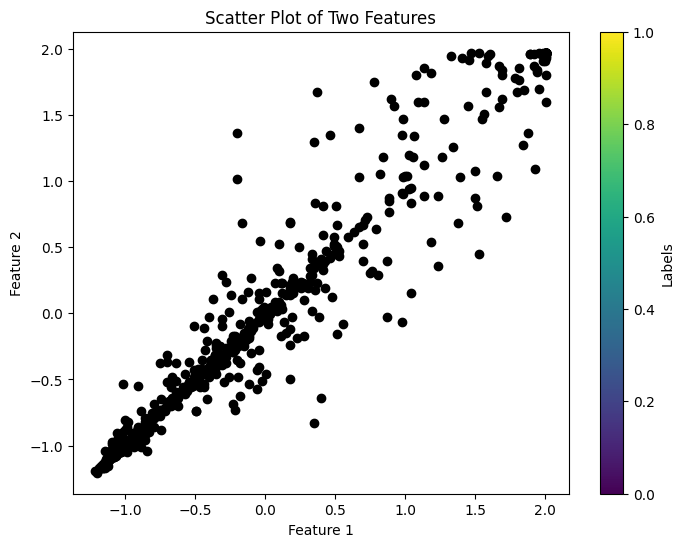

In [31]:
import matplotlib.pyplot as plt

# Select two features from x_train_normalized
feature1 = x_train_normalized[:, 0]  # Replace 0 with the index of the first feature you want to plot
feature2 = x_train_normalized[:, 1]  # Replace 1 with the index of the second feature you want to plot

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(feature1, feature2, c=y_train, cmap='viridis')  # Use labels as colors (y_train)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Two Features')
plt.colorbar(label='Labels')
plt.show()


<ipython-input-32-c52d5583205f>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=y_train, cmap='tab10', s=20)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


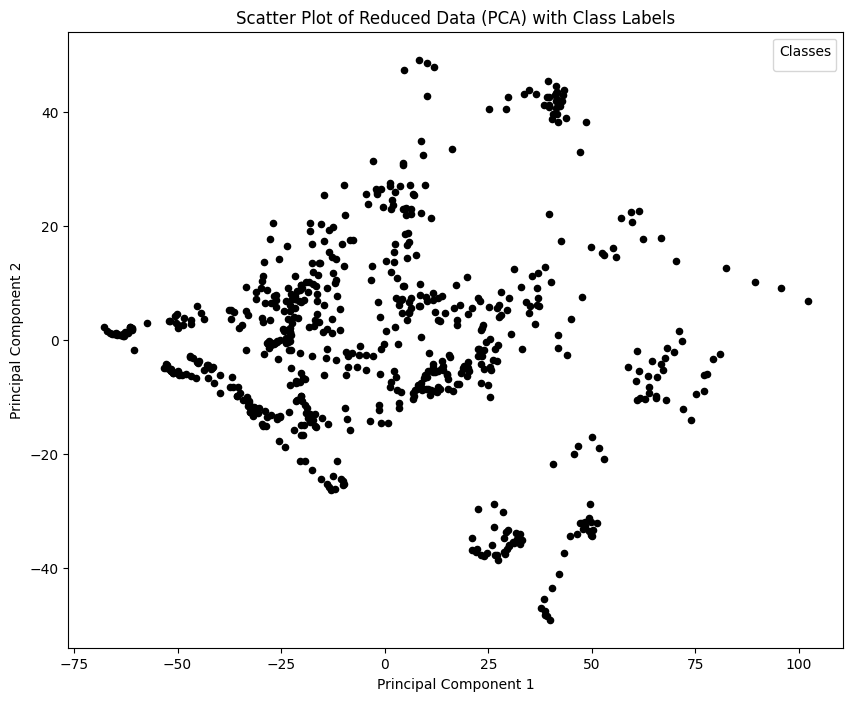

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce the dimensionality of x_train_normalized using PCA (you can adjust n_components)
pca = PCA(n_components=2)
x_train_reduced = pca.fit_transform(x_train_normalized)

# Create a scatter plot with class labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=y_train, cmap='tab10', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Reduced Data (PCA) with Class Labels')

# Add a legend
classes = list(range(10))
plt.legend(handles=scatter.legend_elements()[0], labels=classes, title='Classes')

plt.show()


<ipython-input-34-1b077ee1d4bb>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='tab10', s=20)


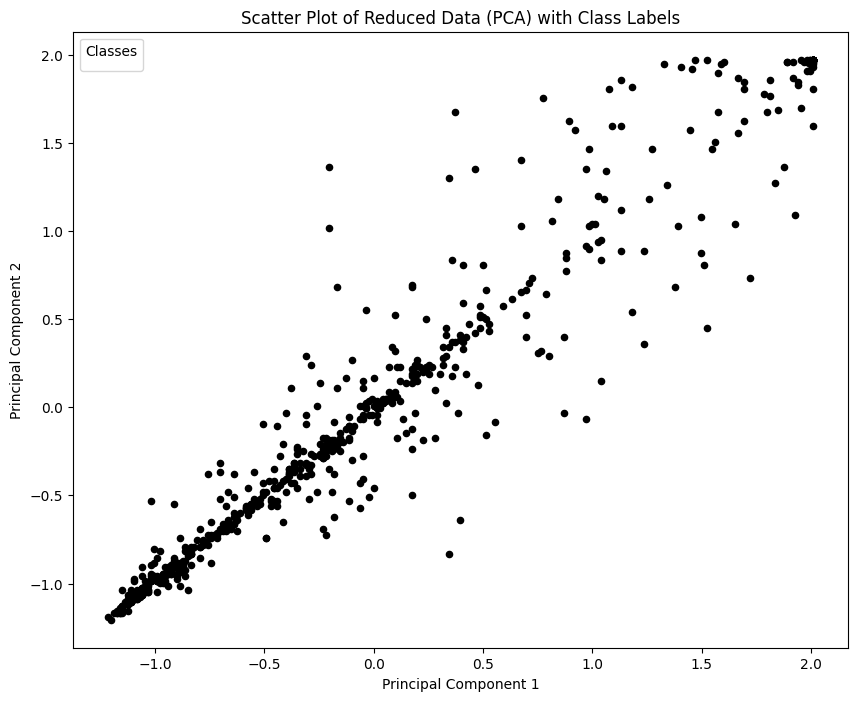

In [34]:
import matplotlib.pyplot as plt

# Create a scatter plot with class labels
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap='tab10', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of Reduced Data (PCA) with Class Labels')

# Add a legend
classes = list(range(10))
plt.legend(handles=scatter.legend_elements()[0], labels=classes, title='Classes')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


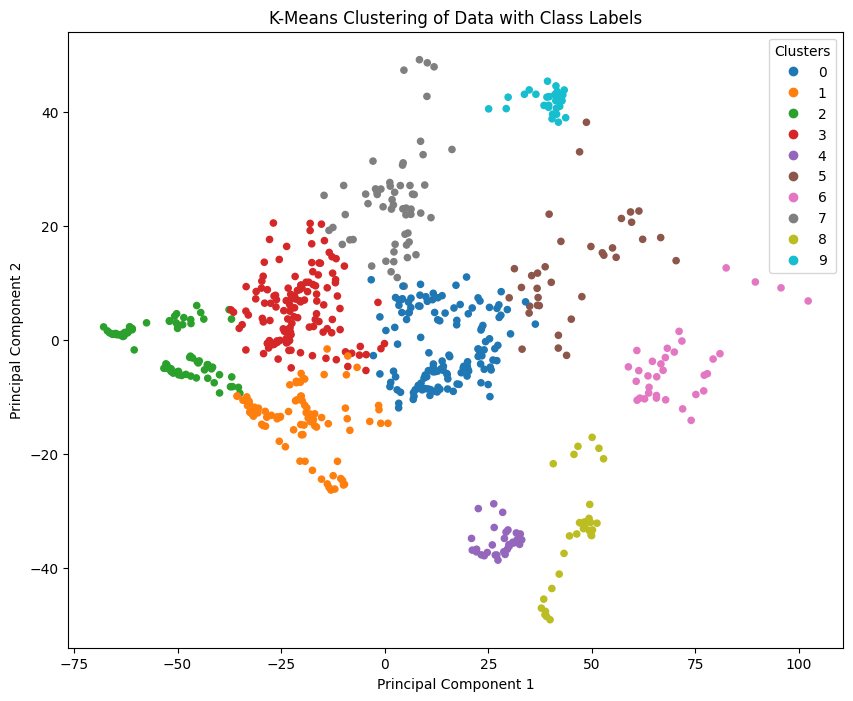

In [38]:
from sklearn.cluster import KMeans

# Specify the number of clusters (adjust as needed)
n_clusters = 10  # Assuming you want 10 clusters based on the number of classes

# Create the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the model to the data
kmeans.fit(x_train_normalized)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Visualize the clusters (you can use PCA for visualization)
x_train_reduced = pca.transform(x_train_normalized)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=cluster_labels, cmap='tab10', s=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering of Data with Class Labels')

# Add a legend
clusters = list(range(n_clusters))
plt.legend(handles=scatter.legend_elements()[0], labels=clusters, title='Clusters')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

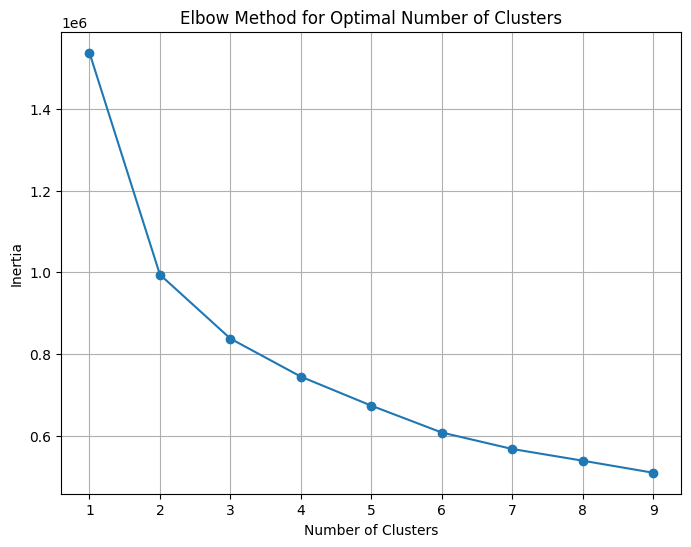

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Specify the range of clusters you want to consider
cluster_range = range(1, 10)  # Adjust the range as needed

# Initialize a list to store the inertia values
inertia = []

# Calculate the inertia for different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(x_train_normalized)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

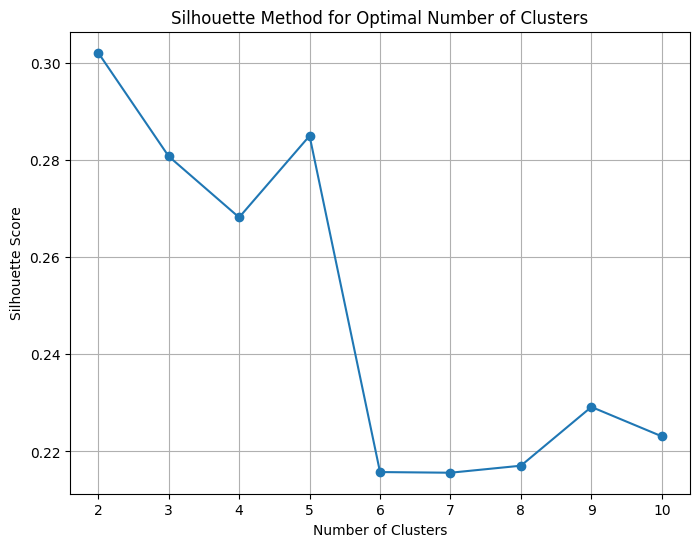

Optimal Number of Clusters: 2


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Specify the range of clusters you want to consider
cluster_range = range(2, 11)  # Adjust the range as needed

# Initialize a list to store the silhouette scores
silhouette_scores = []

# Calculate the silhouette score for different numbers of clusters
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(x_train_normalized)
    silhouette_avg = silhouette_score(x_train_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Find the number of clusters that maximizes the silhouette score
optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Plot the Silhouette Method graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.grid()
plt.show()

print(f'Optimal Number of Clusters: {optimal_num_clusters}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

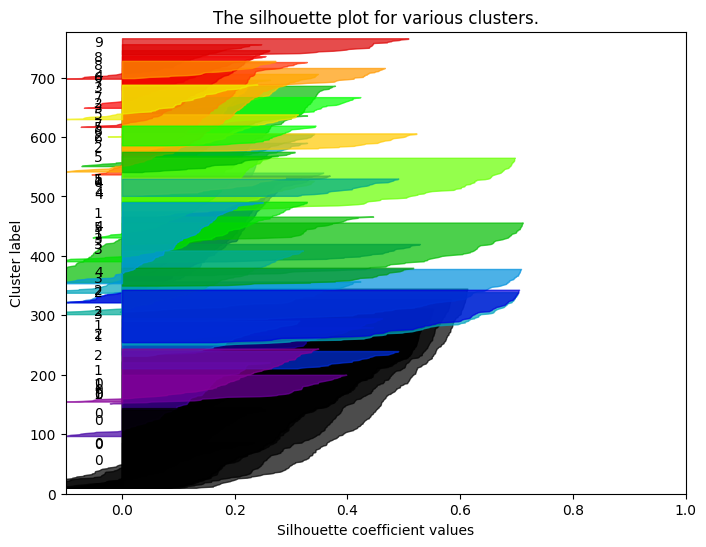

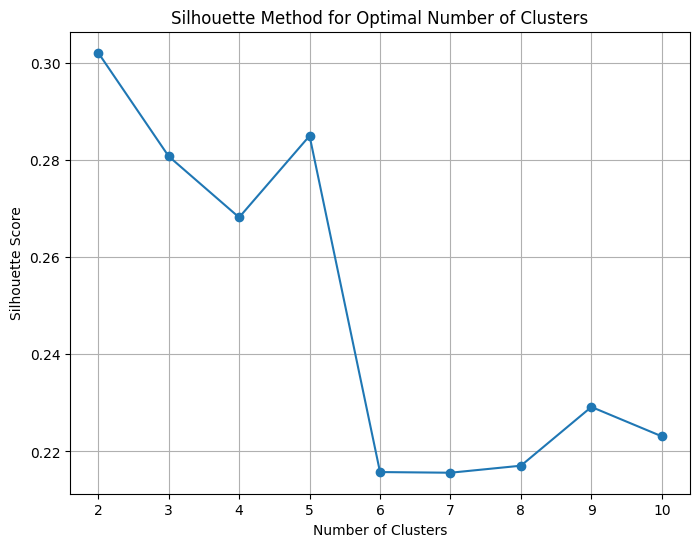

Optimal Number of Clusters: 2


In [44]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Specify the range of clusters you want to consider
cluster_range = range(2, 11)  # Adjust the range as needed

# Create a subplot grid for the silhouette plots
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# Initialize a list to store the silhouette scores
silhouette_scores = []

for n_clusters in cluster_range:
    # Create a subplot with 1 row and 1 column
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(x_train_normalized) + (n_clusters + 1) * 10])

    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(x_train_normalized)

    # Calculate the silhouette score for the current cluster
    silhouette_avg = silhouette_score(x_train_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_train_normalized, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to the current cluster
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]

        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for various clusters.")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

# Find the number of clusters that maximizes the silhouette score
optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]

# Plot the Silhouette Method graph
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.grid()
plt.show()

print(f'Optimal Number of Clusters: {optimal_num_clusters}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


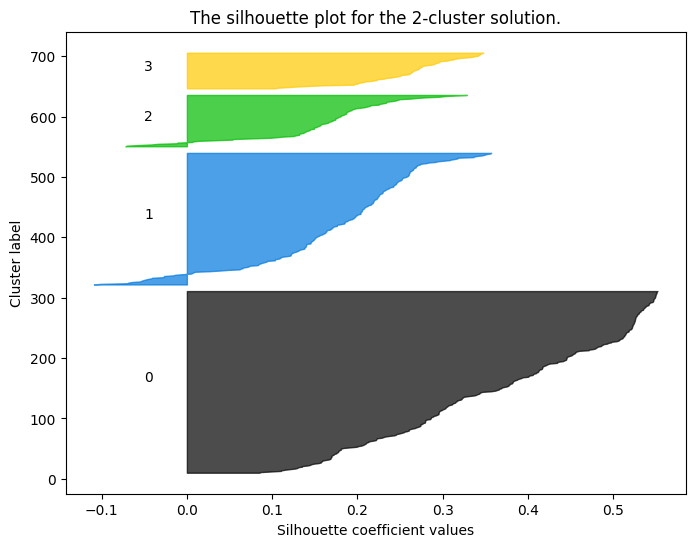

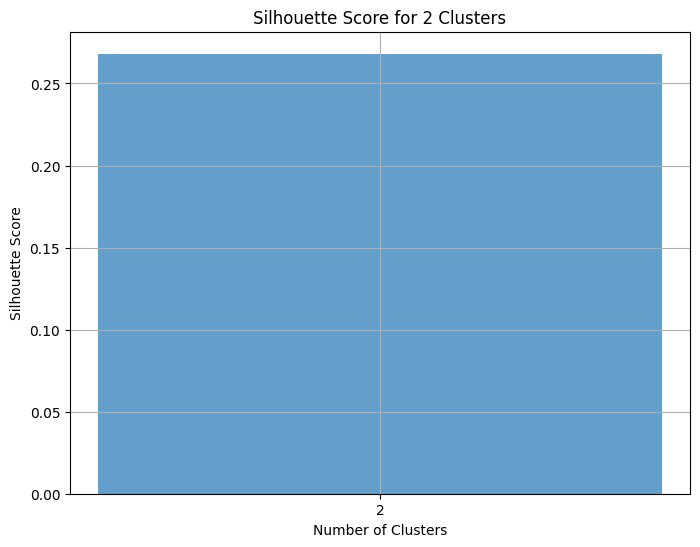

Silhouette Score for 2 Clusters: 0.2681463062224342


In [46]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Create a subplot grid for the silhouette plot
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(8, 6)

# Initialize a list to store the silhouette scores
silhouette_scores = []

n_clusters = 4  # Specify the number of clusters (in this case, 2)

# Create a KMeans model with 2 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
cluster_labels = kmeans.fit_predict(x_train_normalized)

# Calculate the silhouette score for the 2-cluster solution
silhouette_avg = silhouette_score(x_train_normalized, cluster_labels)
silhouette_scores.append(silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(x_train_normalized, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to the current cluster
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]

    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the 2-cluster solution.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# Plot the Silhouette score
plt.figure(figsize=(8, 6))
plt.bar(2, silhouette_scores[0], align='center', alpha=0.7)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for 2 Clusters')
plt.xticks([2])
plt.grid()
plt.show()

print(f'Silhouette Score for 2 Clusters: {silhouette_scores[0]}')
